In [2]:
import pandas as pd 
import numpy as np 
import matplotlib .pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv(r"Sentimentanalysis")
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


In [4]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   ReviewSummary           568454 non-null  object
 9   ReviewText              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.isnull().sum()

Unnamed: 0                0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:

df.columns

Index(['Unnamed: 0', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText'],
      dtype='object')

In [9]:
#converting the unnamed:0 column to RowId
df.columns=['RowId', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText'] 

In [10]:
#assigning uniue row number
df["RowId"]=np.arange(1,df.shape[0]+1)

In [11]:
df.head()

,RowId,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


In [12]:
df.dtypes

RowId                      int32
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
ReviewSummary             object
ReviewText                object
dtype: object

In [13]:
df.describe() 

,RowId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [14]:
df.isnull().sum()

RowId                     0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [15]:
#adding helpfulness fraction column
#helpfulness fraction=HelpfulnessNumerator/HelpfulnessDenominator
df["Helpfulness"]=df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]

In [16]:
df["Helpfulness"]

0         1.0
1         NaN
2         1.0
3         1.0
4         NaN
         ... 
568449    NaN
568450    NaN
568451    1.0
568452    1.0
568453    NaN
Name: Helpfulness, Length: 568454, dtype: float64

In [17]:
#replacing the nan in Helpfulness with zero as 0/0 is not defined that is why it is giving nan
df["Helpfulness"]=df["Helpfulness"].replace(np.nan,0)
df["Helpfulness"]

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
568449    0.0
568450    0.0
568451    1.0
568452    1.0
568453    0.0
Name: Helpfulness, Length: 568454, dtype: float64

In [18]:
df.head() 

,RowId,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,0.0


In [19]:
#creating a function to label Helpfulness
def helpful(value):
    if value>0.5:
        return ">0.5"
    elif value<0.5 and value>0.25:
        return "<0.5"
    else:
        return "Useless"
    
#creating a function to label encode reviews on basis of score
 
def sentiment(score):
    if score>3:
        return "positive"
    elif score<3:
        return "negative"
    else:
        return "neutral"
    
    

In [20]:
from tqdm import tqdm, tqdm_notebook

In [21]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [22]:
#creating new column for label encoding the helpfuness column
df["HelpfulnessLabel"]=df["Helpfulness"].progress_apply(lambda x:helpful(x)) 

100%|██████████████████████████████████████████████████████████████████████| 568454/568454 [00:00<00:00, 724535.30it/s]


In [23]:
#creating new column for score labels reflecting sentiment
df["Sentiment"]=df["Score"].progress_apply(lambda x:sentiment(x)) 

100%|██████████████████████████████████████████████████████████████████████| 568454/568454 [00:00<00:00, 728694.77it/s]


In [24]:
#creating new column which counts total number of words in review text column
df["WordCount"]=df["ReviewText"].progress_apply(lambda x:len(x.split()))
df["WordCount"] 

100%|██████████████████████████████████████████████████████████████████████| 568454/568454 [00:04<00:00, 124352.55it/s]


0         48
1         31
2         94
3         41
4         27
          ..
568449    26
568450    46
568451    66
568452    35
568453    21
Name: WordCount, Length: 568454, dtype: int64

In [25]:
#creating a new column that contains both Review Summary and review text
df["Text"]=df["ReviewSummary"]+" " +df["ReviewText"] 

In [26]:
df.head() 

,RowId,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,HelpfulnessLabel,Sentiment,WordCount,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,1.0,>0.5,positive,48,Good Quality Dog Food I have bought several ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,0.0,Useless,negative,31,Not as Advertised Product arrived labeled as...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1.0,>0.5,positive,94,"""Delight"" says it all This is a confection t..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,1.0,>0.5,negative,41,Cough Medicine If you are looking for the se...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,0.0,Useless,positive,27,Great taffy Great taffy at a great price. T...


#### ANALYZING THE GIVEN DATA

In [27]:
#counting the number of users who have given reviews
print("The number of users are : ",len(df["UserId"].unique())) 

The number of users are :  256059


In [28]:
#counting the number of unique products for which the review is given 
print("The number of products are : ",len(df["ProductId"].unique()))   

The number of products are :  74258


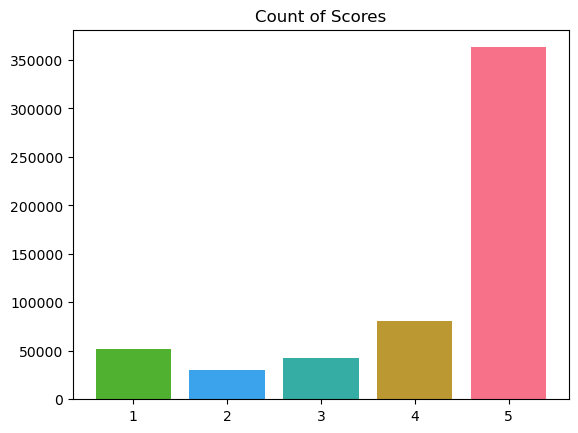

In [29]:
#countplot of scores
colors=sns.color_palette("husl")
plt.bar(data=df,height=df["Score"].value_counts(), x =df["Score"].value_counts().index,color=colors)
plt.title("Count of Scores")
plt.show() 

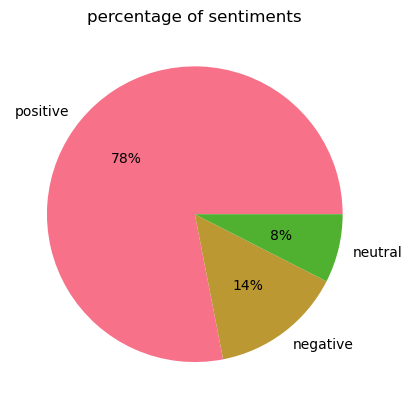

In [30]:
#countplot of sentiment
colors=sns.color_palette("husl")
plt.pie(df["Sentiment"].value_counts(), labels =df["Sentiment"].value_counts().index,colors=colors,autopct='%.0f%%')
plt.title("percentage of sentiments")
plt.show()

In [31]:
len(df[df["Sentiment"]=="negative"])

82037

In [32]:
len(df[df["Sentiment"]=="positive"]) 

443777

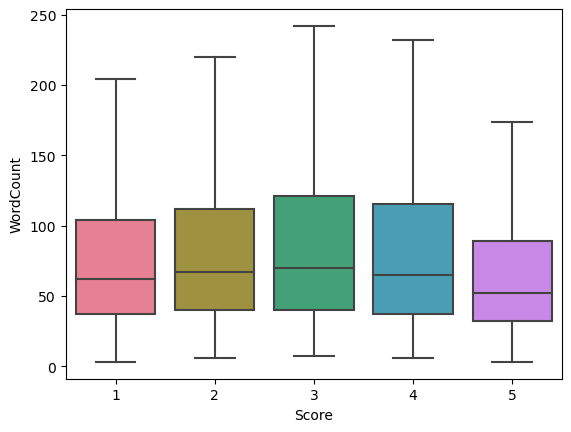

In [33]:
#word count distribution
sns.boxplot(data=df,x="Score",y="WordCount",showfliers=False,palette="husl") 
plt.show()  

In [34]:
#getting the average word count
df.groupby("Score")["WordCount"].mean().to_frame()

,WordCount
Score,
1,87.323697
2,90.040881
3,95.645755
4,91.393156
5,74.168167


In [35]:
#getting the median word count
df.groupby("Score")["WordCount"].median().to_frame() 

,WordCount
Score,
1,62.0
2,67.0
3,70.0
4,65.0
5,52.0


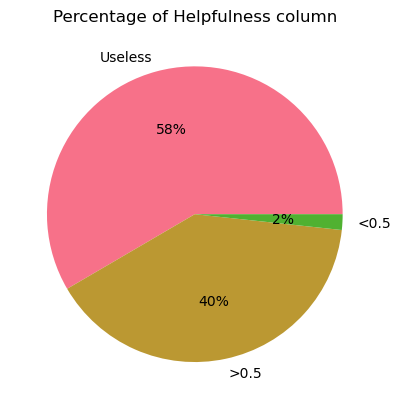

In [36]:
#helpfulness count
colors=sns.color_palette("husl")
plt.pie(df["HelpfulnessLabel"].value_counts(), labels =df["HelpfulnessLabel"].value_counts().index,colors=colors,autopct='%.0f%%')
plt.title("Percentage of Helpfulness column")
plt.show() 

<AxesSubplot:xlabel='HelpfulnessLabel', ylabel='count'>

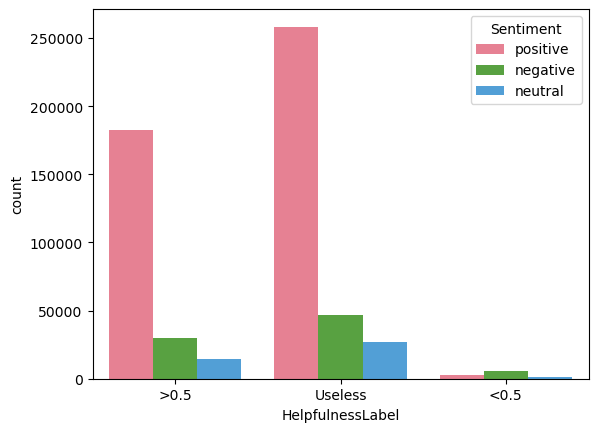

In [37]:
#helpfulness wrt o sentiment 
sns.countplot(data=df,x="HelpfulnessLabel",hue="Sentiment",palette="husl") 

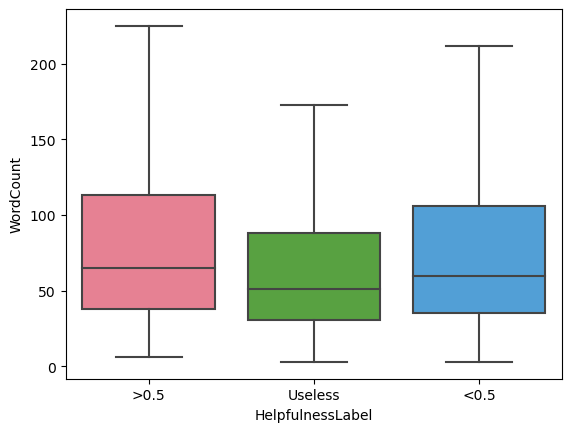

In [38]:
#getting word count for helpfulness reviews
sns.boxplot(data=df,x="HelpfulnessLabel",y="WordCount",showfliers=False,palette="husl")
plt.show() 

In [39]:
#!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00


In [40]:

from wordcloud import WordCloud

In [41]:
import nltk
from nltk.corpus import stopwords 

In [42]:
#creating a dataframe for positive sentiments
df_positive=df[(df["Score"]==4)|(df["Score"]==5)]

#joining the positive sentences 
words=" ".join(df_positive["Text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","recommend","really","good","best","product","make","happy","favourite","perfect"]])

In [43]:
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 

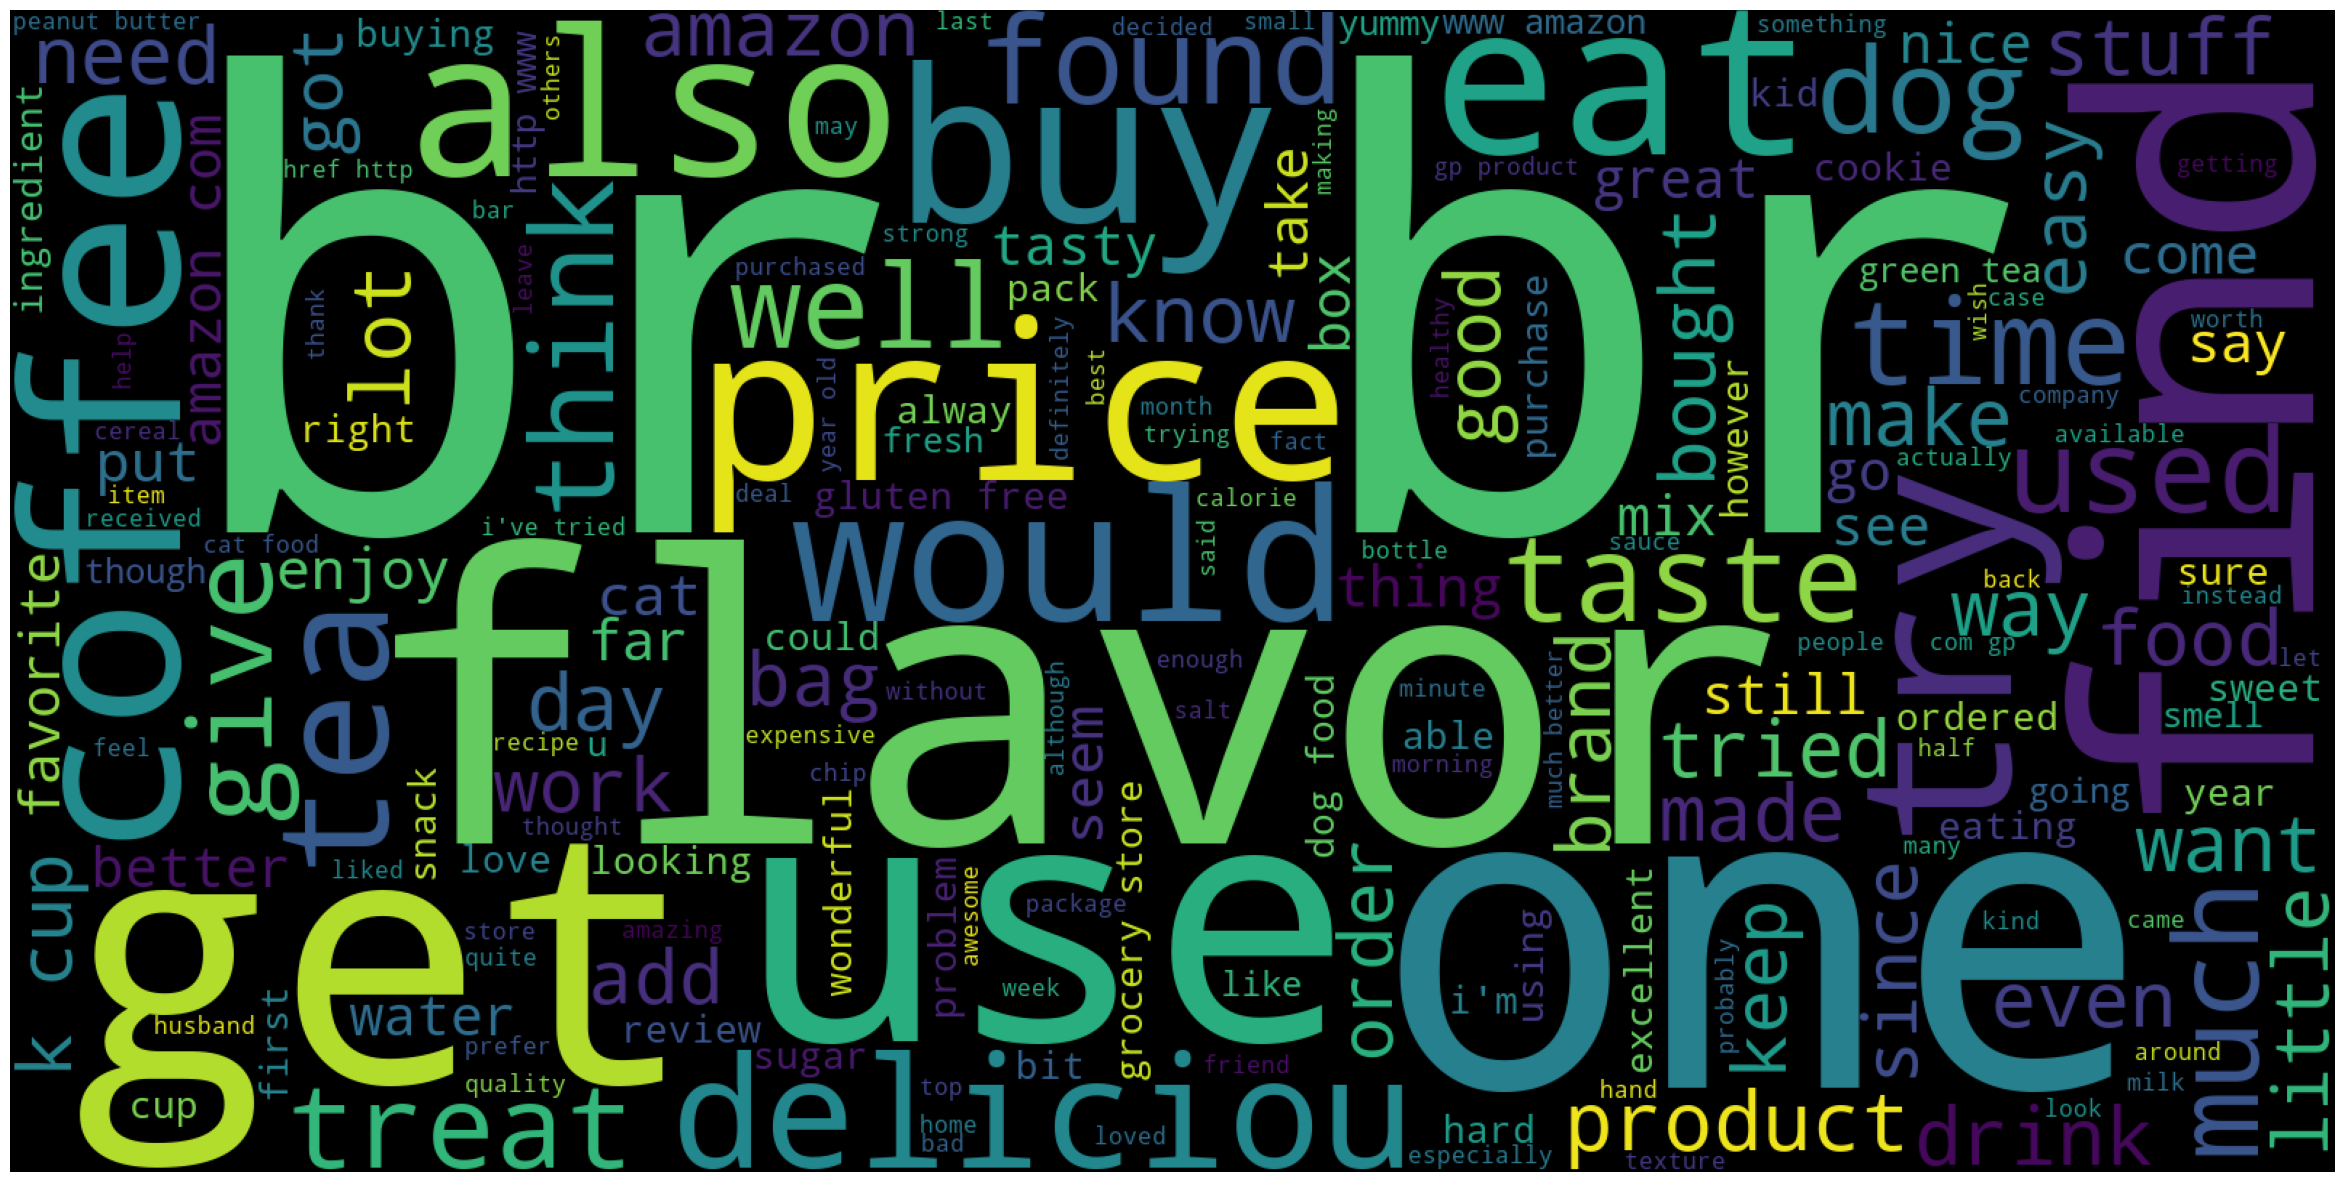

In [44]:
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

In [45]:
#creating a dataframe for negative sentiments
df_negative=df.loc[(df["Score"]==1)|(df["Score"]==2)]

#joining the negative sentences 
words=" ".join(df_negative["Text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["hate","bad","worst","taste","recommend","really"]]) 

In [46]:
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 

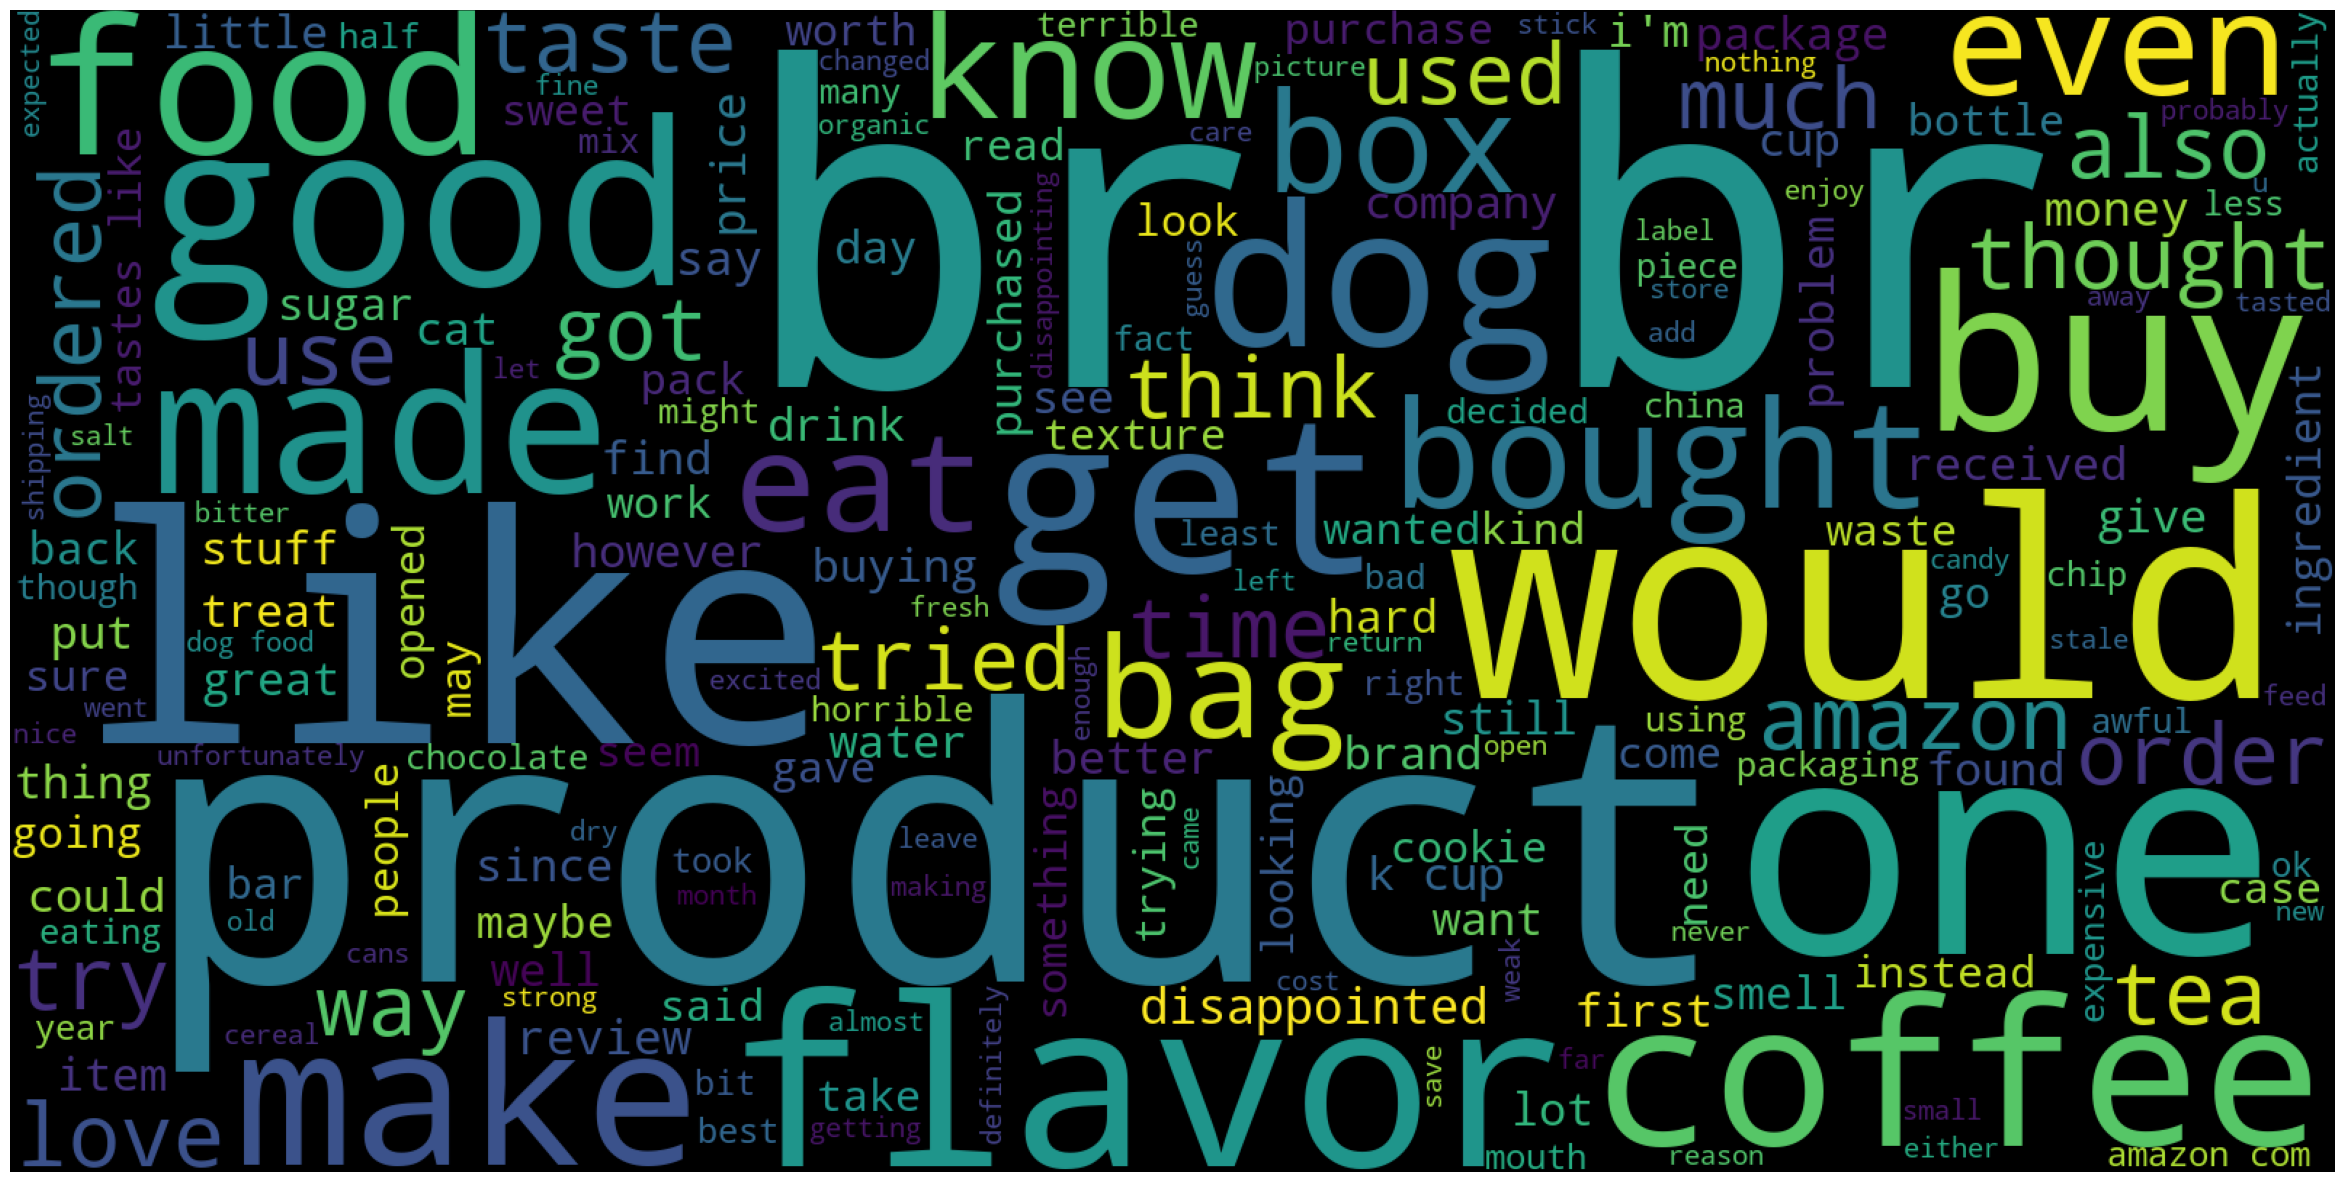

In [47]:
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()